# T Test

--> there are 2 types of T test they are 
1. one sampled t-test
2. two - sampled t-test

In [1]:
# One sample Testing
# let us consinder a set of ages from a class
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [2]:
len(ages)

32

In [3]:
import numpy as np
age_mean=np.mean(ages)
print(age_mean)

30.34375


In [4]:
#let us take a sample and perform

sample=10
age_sample=np.random.choice(ages,sample)
age_sample

array([43, 16, 32, 35, 43, 14, 23, 50, 30, 25])

In [5]:
from scipy.stats import ttest_1samp

In [6]:
t_test,p_value = ttest_1samp(age_sample,30) # here 30 is the population mean / or expected value of Null Hypothesis == mean

In [7]:
print(p_value)

0.7772173292273366


In [8]:
if p_value < 0.05 :
    print('we reject null hypothesis here')
else:
    print ('we accept null hypothesis')

we accept null hypothesis


## More complex examples

In [9]:
import scipy.stats as stats 
import math

In [10]:
np.random.seed(6)
school = stats.poisson.rvs(loc=18,mu=35,size=1500)
classA = stats.poisson.rvs(loc=18,mu=30,size=60)

In [11]:
classA.mean()

np.float64(46.9)

In [12]:
t_test,p_value=ttest_1samp(classA,school.mean())

In [13]:
print(p_value)

1.139027071016194e-13


In [14]:
if p_value < 0.05 :
    print('we reject null hypothesis here')
else:
    print ('we accept null hypothesis')

we reject null hypothesis here


## Two sample T-Test


we compare the mean of 2 indipendent group

In [15]:
from scipy.stats import ttest_ind

In [16]:
np.random.seed(12)
classB = stats.poisson.rvs(loc=18,mu=27,size=60)
classB.mean()

np.float64(44.7)

In [17]:
t_test,p_value=ttest_ind(classA,classB,equal_var=False)

In [18]:
if p_value < 0.05 :
    print('we reject null hypothesis here')
else:
    print ('we accept null hypothesis')

we reject null hypothesis here


## Paired T-test

when u want to check 2 diff samples form same population

In [19]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [20]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[16.86201983 33.57873174 20.3299827  27.3771395  34.36420881 40.05941216
 24.93827982 26.519014   25.42851213 26.50667769 24.32984284 23.1845637
 25.93234756 29.99601605 35.80095696]


In [21]:
df=pd.DataFrame({"weight_10":np.array(weight1),"weight_20":np.array(weight2),"weight_change":np.array(weight2)-np.array(weight1)})

<IPython.core.display.Javascript object>

In [22]:
df

weight_10  weight_20  weight_change
0          25  16.862020      -8.137980
1          30  33.578732       3.578732
2          28  20.329983      -7.670017
3          35  27.377139      -7.622861
4          28  34.364209       6.364209
5          34  40.059412       6.059412
6          26  24.938280      -1.061720
7          29  26.519014      -2.480986
8          30  25.428512      -4.571488
9          26  26.506678       0.506678
10         28  24.329843      -3.670157
11         32  23.184564      -8.815436
12         31  25.932348      -5.067652
13         30  29.996016      -0.003984
14         45  35.800957      -9.199043

In [23]:
from scipy.stats import ttest_rel

In [24]:
t_test,p_value=ttest_rel(weight1,weight2)
print(p_value)

0.05922464781246518


In [25]:
if p_value < 0.05 :
    print('we reject null hypothesis here')
else:
    print ('we accept null hypothesis')

we accept null hypothesis


### Correlation

In [26]:
df = sns.load_dataset("iris")

<IPython.core.display.Javascript object>

In [27]:
df.corr(numeric_only=True)

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

<IPython.core.display.Javascript object>

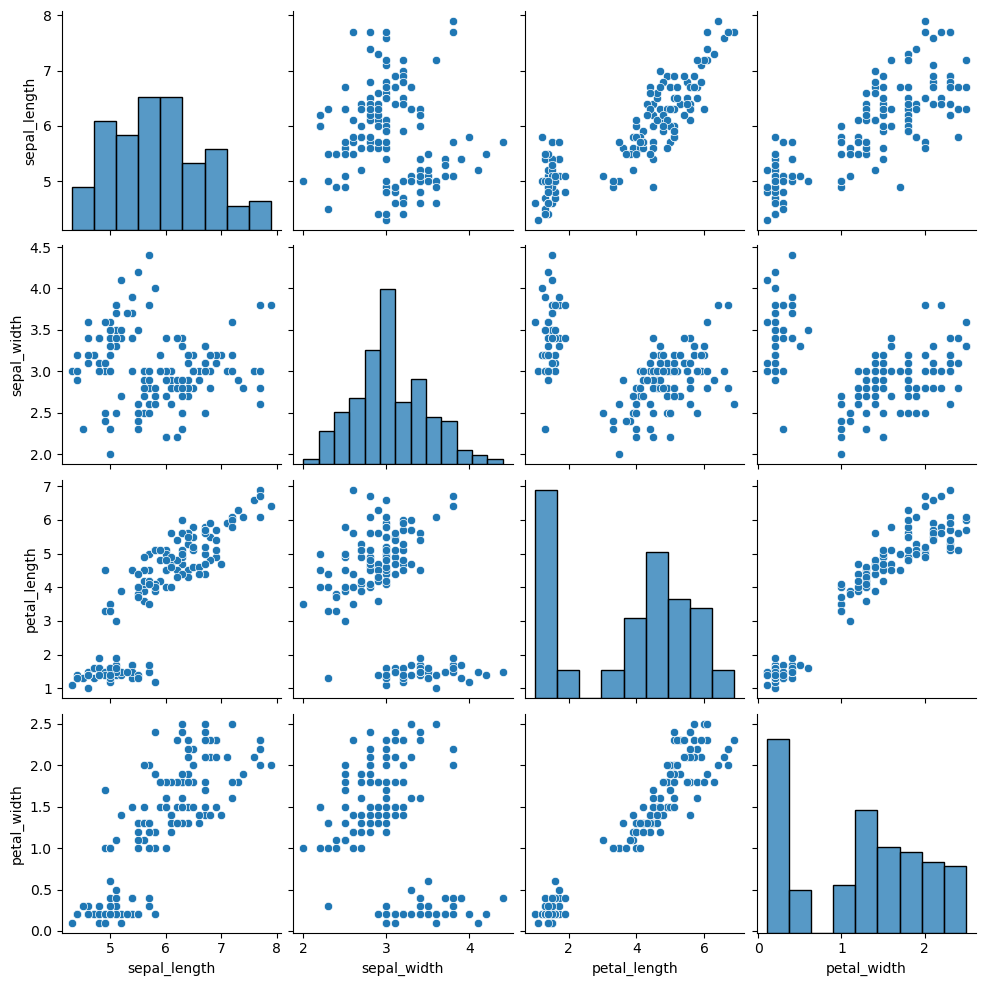

In [28]:
sns.pairplot(df)

## CHI - Squar test

this is applied when there are 2 catogorical var in a single data set 

In [29]:
import scipy.stats as stat

In [30]:
df=sns.load_dataset('tips')

<IPython.core.display.Javascript object>

In [31]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [32]:
# Now let us take 2 catagorial features for the process
dft=pd.crosstab(df['sex'],df['smoker']) # crosstab helps in creatring a table using these 2 features
dft

<IPython.core.display.Javascript object>

smoker  Yes  No
sex            
Male     60  97
Female   33  54

In [33]:
# the above output is observed values of the 2 features
# now we use chi square contigency
obv=dft.values
print(obv)
val=stat.chi2_contingency(dft)

[[60 97]
 [33 54]]


In [34]:
val

Chi2ContingencyResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [35]:
exp=val[3]

In [36]:
row=len(dft.iloc[0:2,0])
col=len(dft.iloc[0,0:2])
dig=(row-1)*(col-1)
print('Degree of Freedom :',dig)
alpha=0.05

Degree of Freedom : 1


In [37]:
from scipy.stats import chi2

chisq=sum([(o-e)**2./e for o,e in zip(obv,exp)])
chisq_stat=chisq[0]+chisq[1]

In [38]:
print('Chi Square statestic value is : ',chisq_stat)

Chi Square statestic value is :  0.001934818536627623


In [39]:
crit_val=chi2.ppf(q=1-alpha,df=dig)
print('The Critical Value is : ',crit_val)

The Critical Value is :  3.841458820694124


In [40]:
# P_Value
p_value=1-chi2.cdf(x=chisq_stat,df=dig)
print('p-value:',p_value)
print('Significane level',alpha)
print('Degree of freedom',dig)
print('P value',p_value)

p-value: 0.964915107315732
Significane level 0.05
Degree of freedom 1
P value 0.964915107315732


In [41]:
if chisq_stat >= crit_val:
    print("Reject H0, There is a relation btw 2 catogorical value")
else:
    print("Retain H0, There is no relation btw catogorical valuse ")

if p_value <= alpha :
    print("Reject H0, There is a relation btw 2 catogorical value")
else:
    print("Retain H0, There is a no realtion btw catagorical values ")

Retain H0, There is no relation btw catogorical valuse 
Retain H0, There is a no realtion btw catagorical values 
